In [18]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
import numpy as np
from sklearn import preprocessing

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

enc = preprocessing.OneHotEncoder()
enc.fit(y_train)
y_train = enc.transform(y_train).toarray()

print (x_train.shape)
print (x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [2]:
from tensorflow.keras.models import load_model

feature_extractor = load_model('extractor.h5')
feature_encoder = load_model('ae-encoder.h5')
print ("Models loaded!")

Models loaded!


In [3]:
features = feature_extractor.predict(x_train)
print (features.shape)

(50000, 10)


In [93]:
vectors = feature_encoder.predict(features)
print (vectors.shape)

(50000, 32)
[[0.         1.3551102  1.5672371  ... 1.8549912  1.087785   1.7921175 ]
 [0.         0.32036373 2.0205388  ... 1.2509525  1.8111678  1.7366822 ]
 [0.         0.31932262 2.0176942  ... 1.2491373  1.80916    1.7360758 ]
 ...
 [0.         0.19665907 1.7353394  ... 1.1399747  1.5733526  1.5958999 ]
 [0.         0.8672886  1.0661588  ... 0.6961187  2.0809247  2.2087996 ]
 [0.         0.84393907 1.0275322  ... 0.6929536  2.0539324  2.1956625 ]]


In [100]:

print (features[1])
print (vectors[1])

[4.7471875e-07 1.0157270e-06 2.3483503e-07 4.8497888e-08 2.2666168e-08
 5.5097700e-09 2.5999023e-09 2.3778838e-07 1.3031642e-07 9.9999785e-01]
[0.0000000e+00 3.2036373e-01 2.0205388e+00 1.4411354e-01 4.9759236e-01
 0.0000000e+00 4.9990800e-01 5.3411705e-04 1.0022919e+00 7.7503020e-01
 0.0000000e+00 1.1907335e-02 1.0423050e+00 1.0394900e+00 0.0000000e+00
 2.0961545e+00 4.6397570e-01 1.0240160e-01 0.0000000e+00 0.0000000e+00
 1.4129602e+00 0.0000000e+00 0.0000000e+00 1.2338870e+00 2.3502076e+00
 3.7409905e-01 0.0000000e+00 3.1557622e+00 1.7390260e+00 1.2509525e+00
 1.8111678e+00 1.7366822e+00]


In [106]:
import numpy as np
from annoy import AnnoyIndex

index = AnnoyIndex(vectors.shape[1])
for i in range(vectors.shape[0]):
    index.add_item(i, vectors[i,:].tolist())

/home/softdev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  after removing the cwd from sys.path.


In [107]:
index.build(20)
index.save("index.ann")

True

In [108]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
lookup = np.argmax(y_train[:, :], axis=1)

Querying with this random image


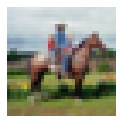

horse


In [117]:
import random
choice_idx = random.randrange(50000)
results = index.get_nns_by_item(choice_idx, 6000)

print ("Querying with this random image")

import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[choice_idx])
plt.axis('off')
plt.show()
print (labels[lookup[choice_idx]])
# print (lookup[choice_idx])

Search results:


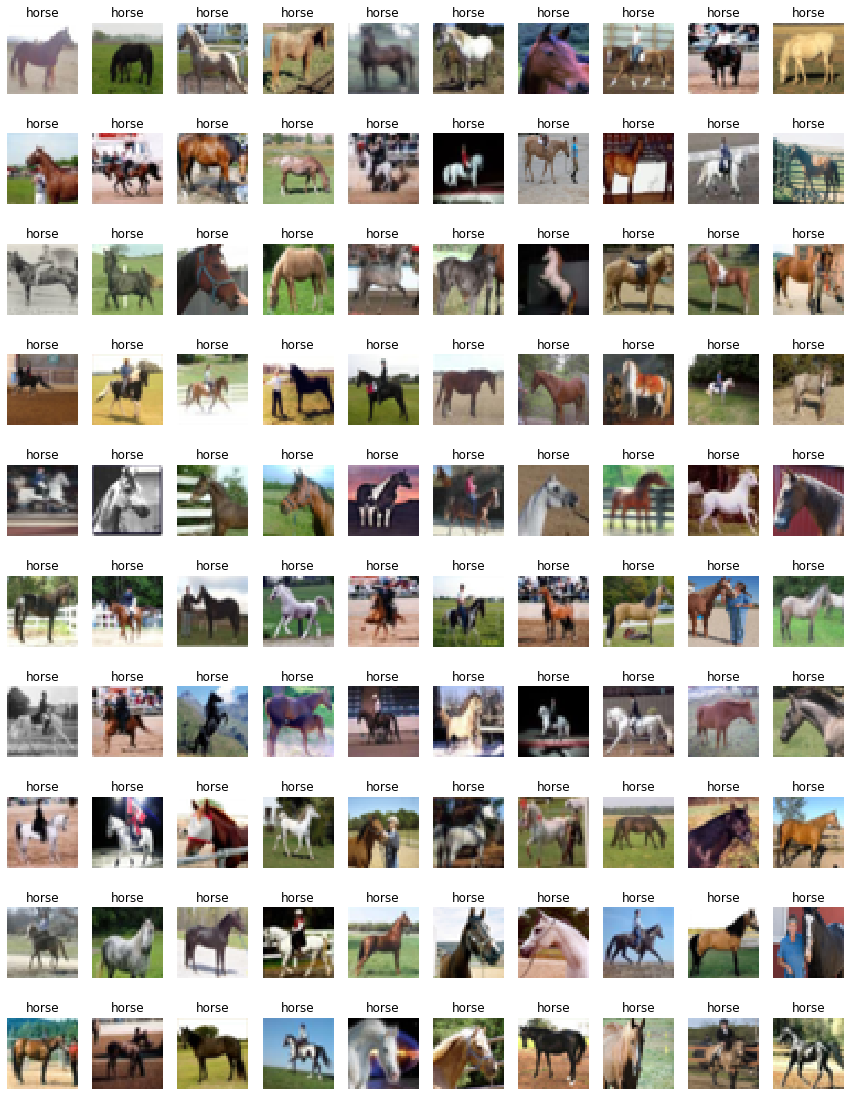

In [118]:
import matplotlib.pyplot as plt


print ("Search results:")

w=10
h=10
fig=plt.figure(figsize=(15,20))
columns = 10
rows = 10
for i in range(100):
#     ax = plt.subplot(5, 100, i+1)
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(x_train[results[i]])
    plt.title(str(labels[lookup[results[i]]]))
    plt.axis('off')
plt.show()

In [119]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
t = np.ones(6000).astype(float)
p = np.array([lookup[x] == lookup[choice_idx] for x in results]).astype(float)

print ("F1 Score for this search:", f1_score(t, p))
print ("Accuracy Score for this search:", accuracy_score(t, p))
print ("Precision Score for this search:", precision_score(t, p))
print ("Recall Score for this search:", recall_score(t, p))

F1 Score for this search: 0.9044097507532184
Accuracy Score for this search: 0.8255
Precision Score for this search: 1.0
Recall Score for this search: 0.8255
